In [2]:
!pip install tensorflow  
!pip install pandas 
!pip install matplotlib
!pip install scikit-learn

In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
df=pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv','train.csv'))

In [112]:
df[df['threat']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
79,003217c3eb469ba9,Hi! I am back again!\r\nLast warning!\r\nStop ...,1,0,0,1,0,0
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1
600,0199d6af27b715f3,I'm also a sock puppet of this account...SUPRI...,1,0,0,1,0,0
802,02230885017a50c5,"Fuck you, Smith. Please have me notified when ...",1,0,1,1,1,0
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
157718,e26b106943e02cbf,bitch \r\nyou are a fucking hore. you suck dic...,1,0,1,1,1,1
158717,f264b7fb9a4b4f53,stupid head \r\n\r\nYOur dumb and you are stup...,1,0,1,1,1,0
158856,f4dca9e513e0366f,"Hey \r\n\r\nhey faggot, are you dead yet? or a...",1,1,1,1,1,0
159029,f780e4f42aa5a344,Death to Musulmans!,1,0,0,1,0,1


In [6]:
#Pre process the data   

In [7]:
from tensorflow.keras.layers import TextVectorization

In [8]:
max_words=200000

In [9]:
vectorizer=TextVectorization(max_tokens=max_words,output_sequence_length=1800,output_mode='int')

In [10]:
x=df['comment_text']

In [11]:
y=df[df.columns[2:]].values

In [12]:
vectorizer.adapt(x.values)

In [13]:
vectorizer_text=vectorizer(x.values)

In [14]:
#vectorizer_text

In [15]:
vectorizer("Lumicrystal as")[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 1, 18,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)>

In [16]:
#test=vectorizer.get_vocabulary()

In [17]:
#"stratophere" in test

In [18]:
dataset=tf.data.Dataset.from_tensor_slices((vectorizer_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [19]:
# dataset.as_numpy_iterator().next()

In [20]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
# train.as_numpy_iterator().next()

In [22]:
#sequential model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dense ,Embedding, Dropout,Bidirectional

In [24]:
model=Sequential()
model.add(Embedding(max_words+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))

model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))

model.add(Dense(6,activation="sigmoid"))


In [25]:
model.compile(loss="BinaryCrossentropy", optimizer="adam")

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [27]:
model=tf.keras.models.load_model("test_toxicity.h5")

In [28]:
history=model.fit(train,epochs=3,validation_data=val)

Epoch 1/3
6981/6981 [==============================] - 14371s 2s/step - loss: 0.0463 - val_loss: 0.0406
Epoch 2/3
6981/6981 [==============================] - 6355s 910ms/step - loss: 0.0405 - val_loss: 0.0364
Epoch 3/3
6981/6981 [==============================] - 4527s 648ms/step - loss: 0.0357 - val_loss: 0.0318


In [29]:
# model.predict(np.array([vectorizer("i hate u")]))>0.5

In [30]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

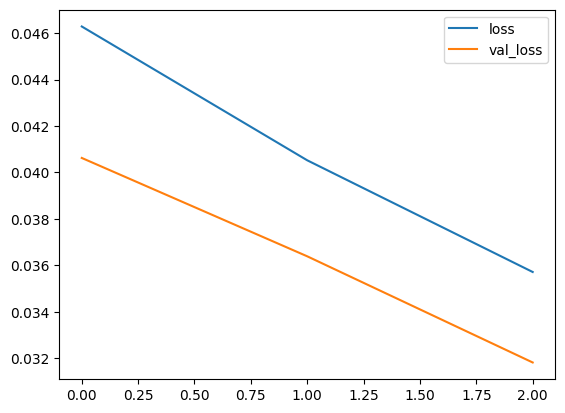

In [31]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [72]:
#prediction


<bound method Index.max of Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')>

In [113]:
input_str=vectorizer("Hi! I am back again!\r\nLast warning!\r\nStop ")

In [114]:
model.predict(np.expand_dims(input_str,0)) >0.5

1/1 [==============================] - 0s 55ms/step


array([[False, False, False, False, False, False]])

In [35]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [36]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 114ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [37]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [38]:
#evaluate

In [39]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [115]:
for batch in test.as_numpy_iterator(): 
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 118ms/step


In [116]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8777046203613281, Recall:0.772990882396698, Accuracy:0.5143134593963623


In [ ]:
#Appp 

In [ ]:
!pip install gradio jinja2

In [ ]:
import tensorflow as tf
import gradio as gr

c:\Users\Lenovo\Desktop\Project\kesar1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [117]:
model.save('test_toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('test_toxicity.h5')

In [123]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}  '.format(col, results[0][idx]>0.5)
    
    return text

In [145]:
# df[(df['severe_toxic']==1) & (df['identity_hate']==1) ]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
887,026bd33490542b2e,"you gay motherfucker i know where you live,i a...",1,1,1,0,1,1
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1116,03088aacc4600323,"Fuck you faggot, I don't care if i get blocked...",1,1,1,0,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1
2359,065675c12e22e3e1,You fascit Nazi! You socialist bastard! You fi...,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
157428,ddf6dc5cf6931f48,Ok.... \r\n\r\nBitch i swear to God i will fuc...,1,1,1,1,1,1
158023,e778d4f09a32b559,"Fuck You \r\n\r\nNigga, fuck you.\r\n\r\nFlock...",1,1,1,0,1,1
158498,eee236660953137a,n ig ger nig ger \r\n\r\nHi n i g g e r,1,1,1,0,0,1
159281,fb726deec64157bd,LoL!! \r\n\r\nyou're GAY!! you will never know...,1,1,1,0,1,1


1/1 [==============================] - 0s 51ms/step


'toxic: True  severe_toxic: False  obscene: False  threat: False  insult: False  identity_hate: False  '

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://90c3a64758fbbc95c6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 83ms/step
